In [1]:
import numpy as np 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### Features 설명
######  Attrition_Flag : 고객 활동을 나타냄 (이탈한 고객1, 그렇지 않은 경우 0) 타겟 변수
- CLIENTNUM : 고객 고유 식별자
- Customer_Age : 고객의 나이 (수치)
- Gender : 고객의 성별 (범주)
- Dependent_count: 부양하는 가족 수 (범주) 
- Education_Level : 최종 학력 (고등학교, 대학졸업자, 박사 ...) (범주)
- Marital_Status : 기혼, 미혼, 결혼, 알수 없음 (범주)
- Income_Category : 연간 소득 (범주)
- Card_Category : 카드 유형 (블루, 실버, 골드, 플래티넘) (범주)
- Months_on_book : 은행과 거래한 기간 (수치)
- Total_Relationship_Count :고객이 보유한 총 제품 수 (수치)
- Months_Inactive_12_mon :지난 12개월 동안 비활성화 상태인 개월 수 (범주 0~6)
- Contacts_Count_12_mon : 지난 12개월 동안 활동한 개월 수 (범주)
- Credit_Limit : 신용카드 신용 한도 (수치)
- Total_Revolving_Bal : 신용카드의 잔액 (수치)
- Avg_Open_To_Buy : 신용 한도(구매 가능) 지난 12개월간 평균 (수치) 
- Total_Amt_Chng_Q4_Q1 :거래 금액의 변동 (1분기 대비 4분기) (수치)
- Total_Trans_Amt : 12개월간 총 거래 금액 (수치)
- Total_Trans_Ct : 12개월간 총 거래 수 (수치)
- Total_Ct_Chng_Q4_Q1 :  거래 건수 변화 (1분기 대비 4분기) (수치)
- Avg_Utilization_Ratio : 평균 카드 사용률 (수치)

### 데이터 불러오기

In [3]:
data = pd.read_csv('./BankChurners.csv')

In [4]:
data = data.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",axis=1)
data = data.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis = 1)

### 데이터 크기

In [5]:
print("Data shape{}".format(data.shape))

Data shape(10127, 21)


### 데이터 확인

In [6]:
print("Data head\n{}".format(data.head()))

Data head
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1       

### 데이터 summary

In [7]:
print("Data summary\n{}".format(data.describe()))

Data summary
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50

### 데이터 타입확인

In [8]:
print("Data Info\n{}".format(data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 결측치 확인

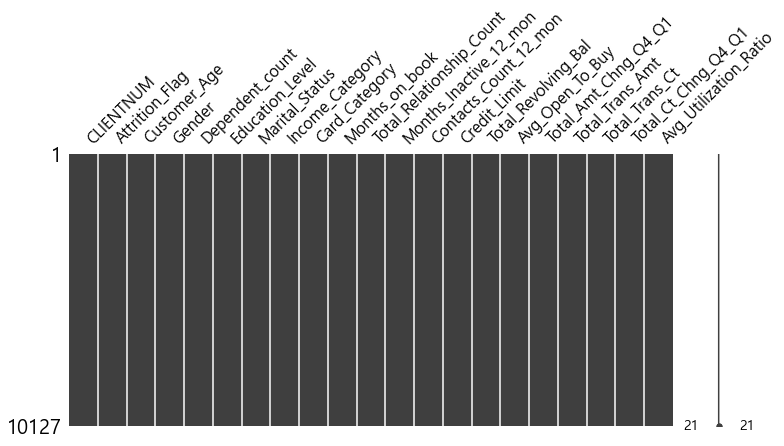

In [9]:
msno.matrix(data,figsize=(12,5))

##### 각 컬럼의 결측치 수

In [10]:
data.isnull().sum() #checking for total null values

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# 클래스 분포 확인

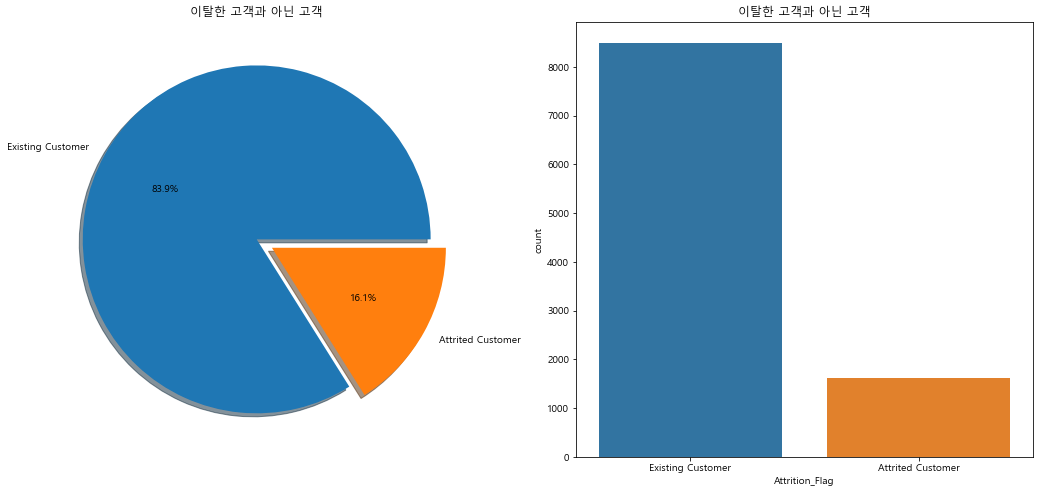

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Attrition_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('이탈한 고객과 아닌 고객')
ax[0].set_ylabel('')
sns.countplot('Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('이탈한 고객과 아닌 고객')
plt.show()

- 클래스의 불균형이 심함
- 이탈한 고객이 1번으로 16.1% 비율을 보이고 있음 

## 범주형 데이터 별 분포 확인 
- Gender : 고객의 성별 (범주)
- Dependent_count: 부양하는 가족 수 (범주)
- Education_Level : 최종 학력 (고등학교, 대학졸업자, 박사 ...) (범주)
- Marital_Status : 기혼, 미혼, 결혼, 알수 없음 (범주)
- Income_Category : 연간 소득 (범주)
- Card_Category : 카드 유형 (블루, 실버, 골드, 플래티넘) (범주)

### 성별 분포 확인

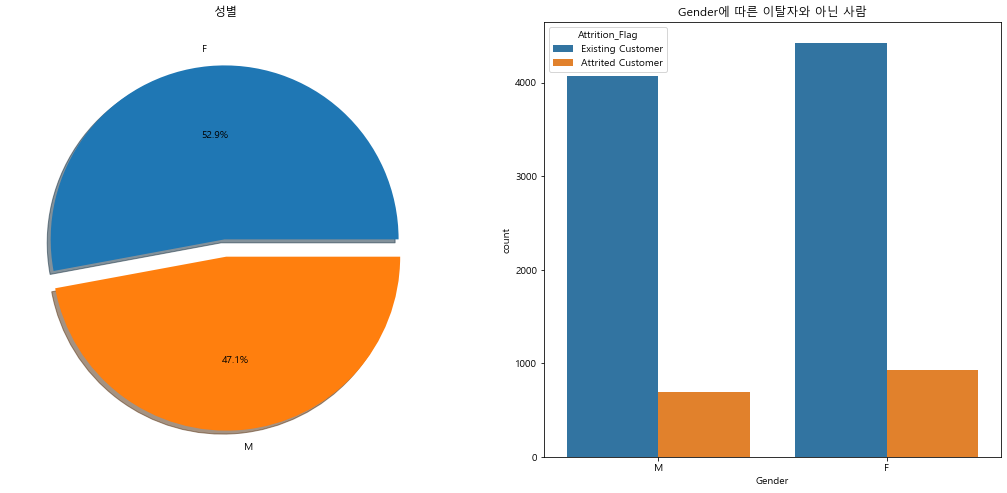

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('성별')
ax[0].set_ylabel('')
sns.countplot('Gender',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('Gender에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석
- 성별의 분포는 비슷한 경향을 보임
- 이탈자와 아닌 사람 모두 여성에게서 높게 나타남

### 부양가족 수  분포 확인

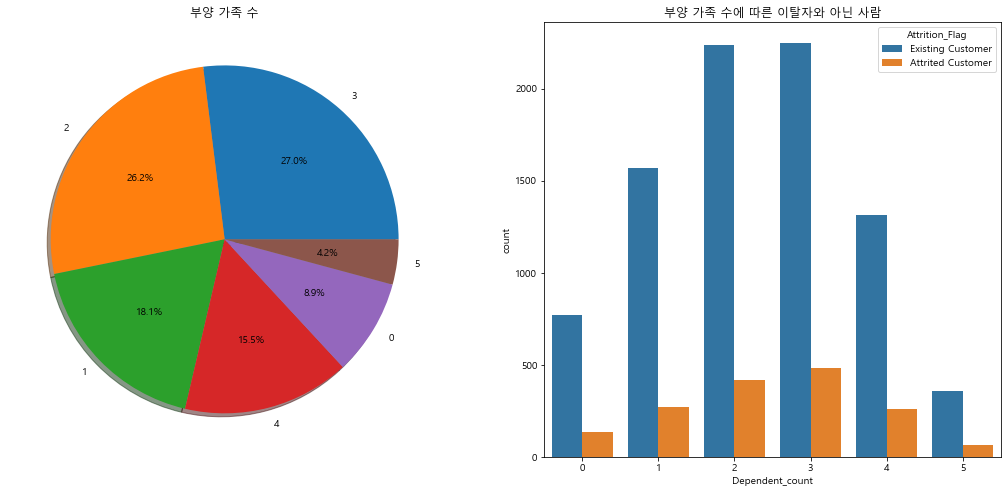

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Dependent_count'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('부양 가족 수')
ax[0].set_ylabel('')
sns.countplot('Dependent_count',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('부양 가족 수에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석
- 부양 가족 수는 2-3명이 전체의 절반 이상(53.2%)을 차지
- 부양 가족 수와 이탈자의 수에서는 큰 관계가 없어보임 

### 최종 학력 분포 확인

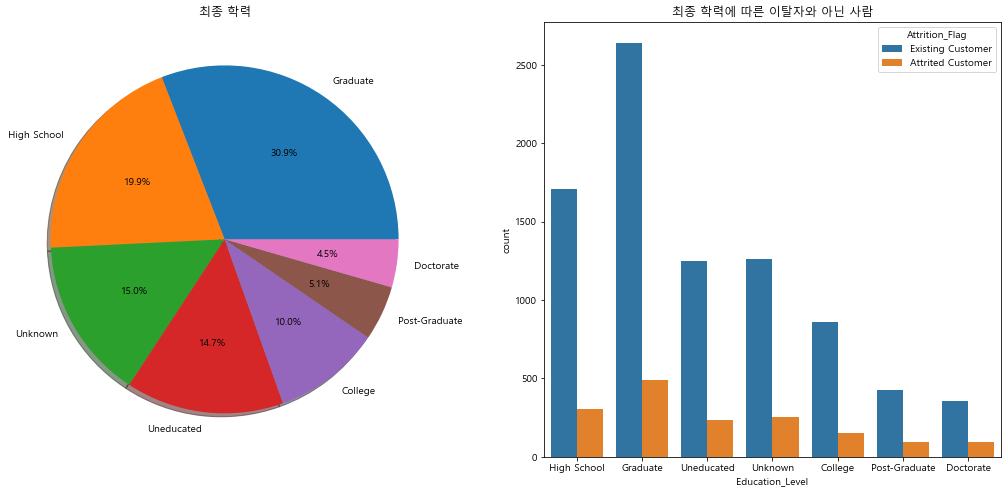

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Education_Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('최종 학력')
ax[0].set_ylabel('')
sns.countplot('Education_Level',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('최종 학력에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석
- 대학교를 졸업한 사람이 가장 많고, 다음이 고등학교를 졸업한 사람이 많음

### 혼인 여부 분포 확인

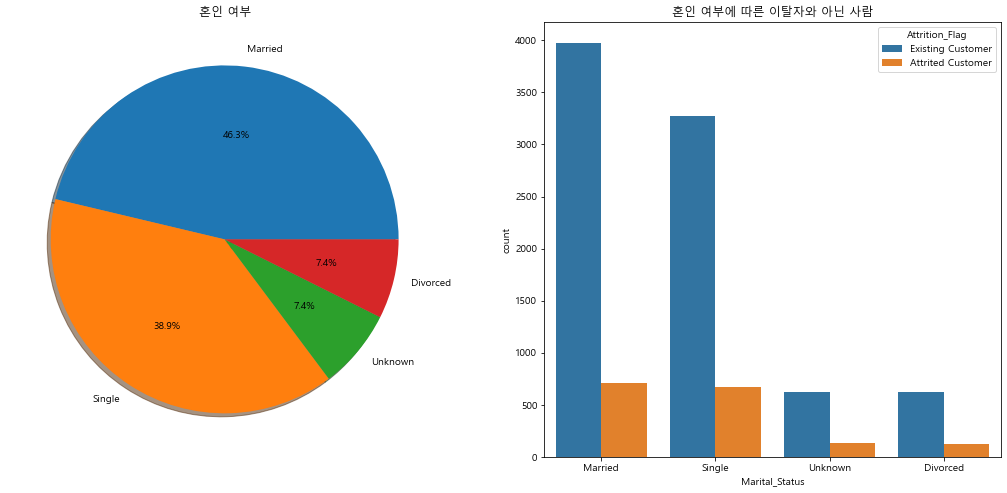

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('혼인 여부')
ax[0].set_ylabel('')
sns.countplot('Marital_Status',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('혼인 여부에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석
- 이혼을 한 사람이 전체의 7.4%임 / 결혼을 했거나 싱글인 사람들이 대부분을 이룸 
- 결혼을 한 사람과 싱글인 사람을 비교해 보았을 때 싱글인 사람들의 이탈율이 높을 것으로 예상이 됨.

### 연간 소득 분포 확인

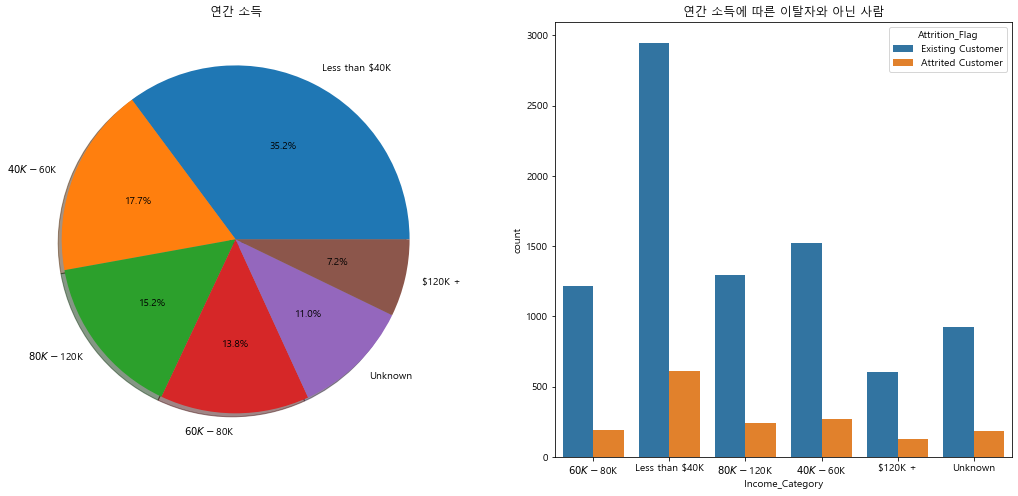

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Income_Category'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('연간 소득')
ax[0].set_ylabel('')
sns.countplot('Income_Category',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('연간 소득에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석 
- 연간 소득 분포를 보았을 때 저소득인 사람이 많고, 고소득인 사람은 적음

### 카드 유형별 분포 확인

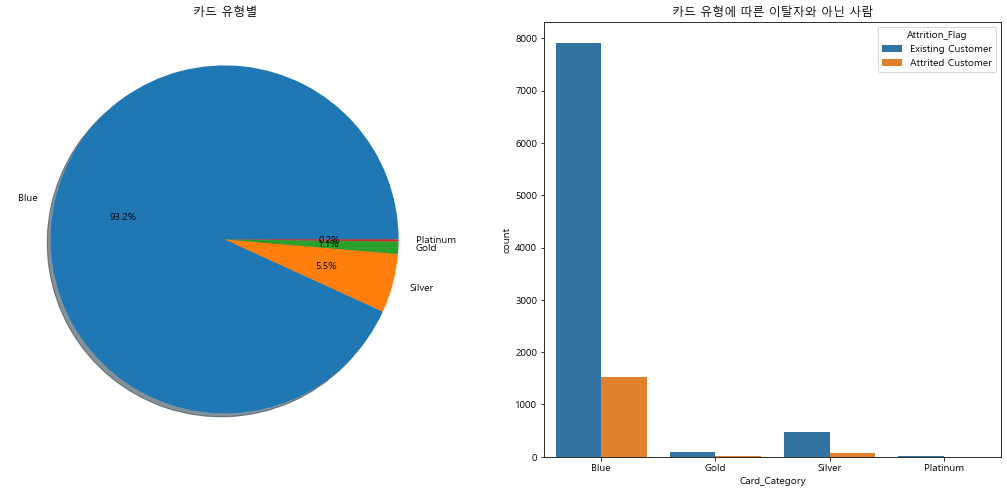

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Card_Category'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('카드 유형별')
ax[0].set_ylabel('')
sns.countplot('Card_Category',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('카드 유형에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석  
- 카드 유형을 보았을 때 대부분 Blue(일반)카드이고, platinum을 쓰는 사람은 극 소수임.

#### 지난 12개월 동안 비활성화 상태인 개월 수에 따른 이탈

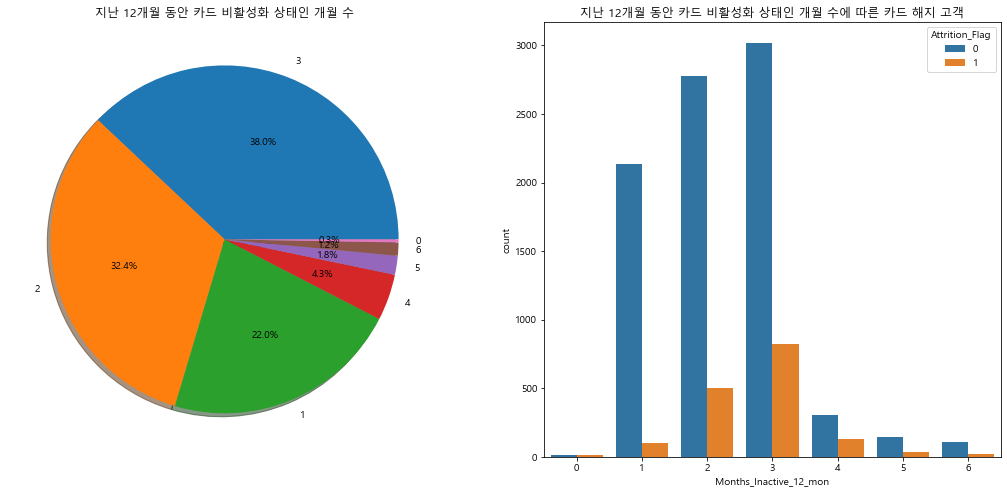

In [146]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Months_Inactive_12_mon'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('지난 12개월 동안 카드 비활성화 상태인 개월 수')
ax[0].set_ylabel('')
sns.countplot('Months_Inactive_12_mon',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('지난 12개월 동안 카드 비활성화 상태인 개월 수에 따른 카드 해지 고객')
plt.show()

###### 해석  


#### 지난 12개월 동안 활동한 개월 수

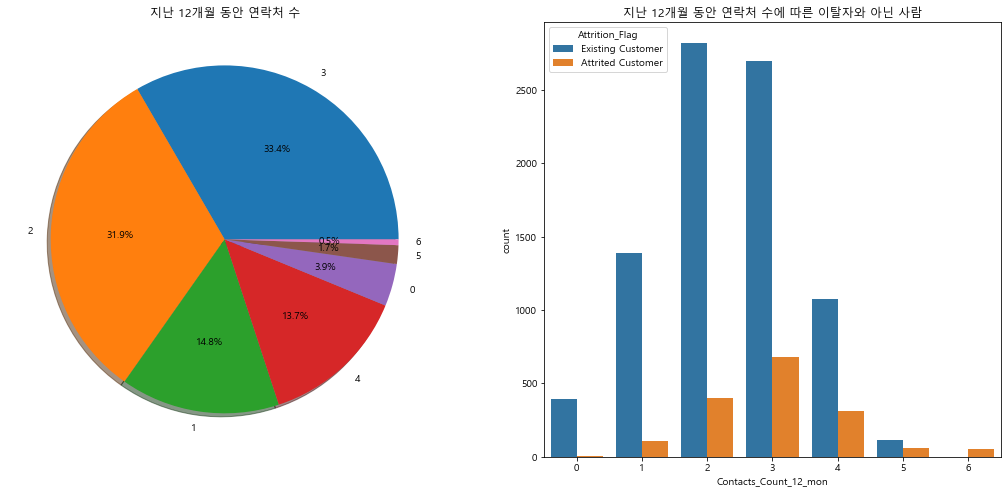

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Contacts_Count_12_mon'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('지난 12개월 동안 연락처 수')
ax[0].set_ylabel('')
sns.countplot('Contacts_Count_12_mon',hue='Attrition_Flag',data=data,ax=ax[1])
ax[1].set_title('지난 12개월 동안 연락처 수에 따른 이탈자와 아닌 사람')
plt.show()

###### 해석

- 내가 생각했을 때의 문제점
    1. 일단 이탈자와 이탈하지 않은 사람의 클래스비율 차이가 많이 커서 countplot이 아닌 y축이 비율로 볼수 있는 그래프를 그리는 것이 더 좋지 않을 까 생각이 듬 .
        - 따라서 비슷한 형태의 그래프가 계속 나오는 느낌 ..?

In [20]:
data['Gender'].replace(['M','F'], [0, 1], inplace=True)
data['Education_Level'].replace(['Doctorate','Post-Graduate','Graduate','College','High School','Uneducated', 'Unknown'],[0,1,2,3,4,5,6], inplace=True)
data['Attrition_Flag'].replace(['Attrited Customer', 'Existing Customer'], [1,0], inplace=True)

# 고객 최종 학력에 따른 이탈율 

In [21]:
pd.crosstab([data.Gender,data.Attrition_Flag],data.Education_Level ,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


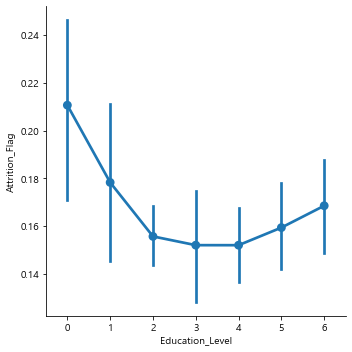

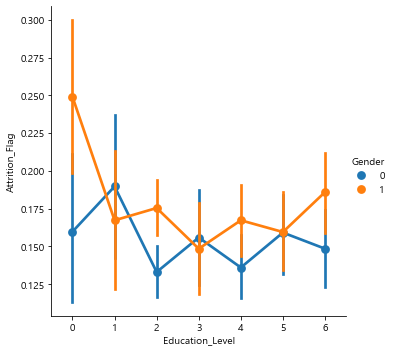

In [22]:
sns.factorplot('Education_Level','Attrition_Flag',data=data)
sns.factorplot('Education_Level','Attrition_Flag',hue='Gender',data=data)
plt.show()

- 전체적으로 보았을 때 박사 과정 졸업에서 가장 많은 이탈을 보였음 
- 남여를 나눠서 비교해 보았을 때
- 여자는 압도적으로 박사 과정 졸업에서 이탈이 많았고 점점 줄어드는 추세를 보임
- 남자는 학벌이 높을 때 좀더 많은 이탈을 보임 
- 따라서 성별에 따라 카드 이탈율이 서로 다른 분포를 보이고 있음 

# 지난 12개월 동안 비활성화 상태인 개월 수에 따른 남여 이탈 비교

C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


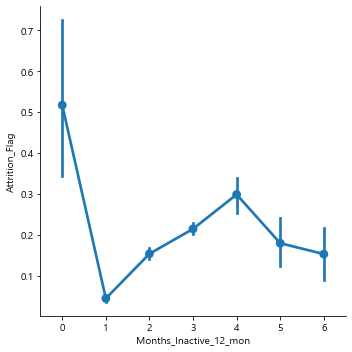

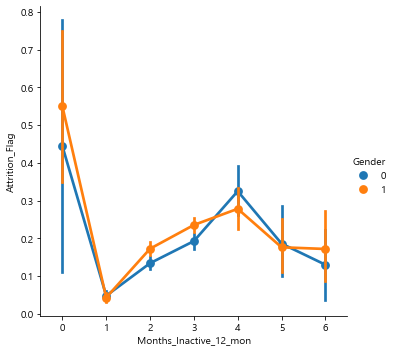

In [23]:
sns.factorplot('Months_Inactive_12_mon','Attrition_Flag',data=data)
sns.factorplot('Months_Inactive_12_mon','Attrition_Flag',hue='Gender',data=data)
plt.show()

- 해석
    - 일단 비활성화 상태인 0에서는 높은 이유가 이탈고객과 비이탈고객 둘다 비율이 비슷하기 때문 => 무시 가능 
    - 4개월로 갈수록 이탈율이 늘어나는데 다시 줄어듬 
    - 이유는 4개월 이상으로 휴먼하는 고객이 상대적으로 적기 때문인듯 따라서 앞부분인 4개월로 갈수록 이탈율이 늘어나는 것에 초점을 맞추면 어떨까 생각이 듬

# 이혼, 결혼, 미혼에 따른 연간 소득이 이탈율에 영향을 주는지

In [24]:
pd.crosstab([data.Marital_Status,data.Attrition_Flag],data.Income_Category,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


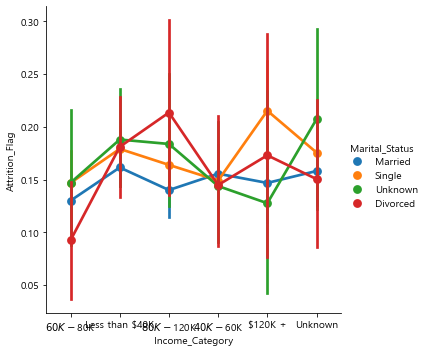

In [25]:
sns.factorplot('Income_Category','Attrition_Flag',hue='Marital_Status',data=data)
plt.show()

- 결혼한 사람은 대체적으로 수입에 상관없이 이탈율이 높은 편은 아님
- 이혼한 사람은 수익이 너무 적거나 너무 많을 때 이탈율이 보통인 사람들에 비해서 낮음
- 싱글인 사람들은 수익이 높을 수록 카드의 이탈율이 높음

# 최종 학력에 따른 카드 카테고리별 이탈수 비교

In [26]:
pd.crosstab([data.Education_Level,data.Attrition_Flag],data.Card_Category,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\rlawj\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


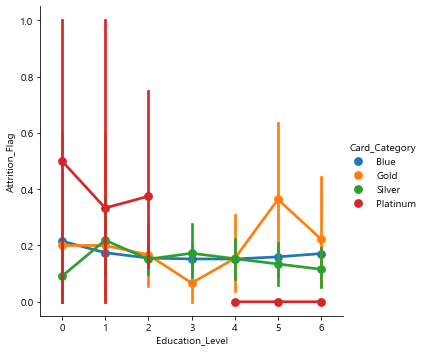

In [27]:
sns.factorplot('Education_Level','Attrition_Flag',hue='Card_Category',data=data)
plt.show()

- 플래티넘 카드를 쓰는 사람의 학벌은 다 높음 
- gold 카드를 쓰는데 학벌이 낮은 사람의 이탈율이 높음

# 수치형 변수 이상치 판별

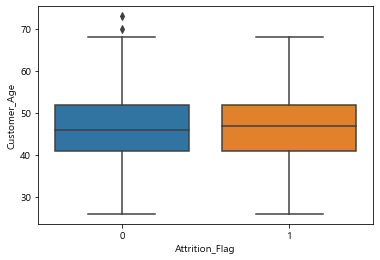

In [28]:
sns.boxplot(y = data['Customer_Age'], x = data['Attrition_Flag'])

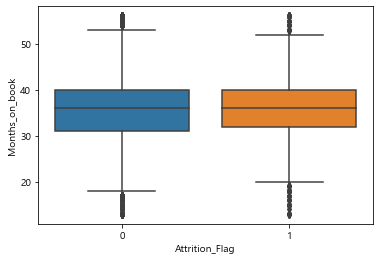

In [29]:
sns.boxplot(y = data['Months_on_book'], x = data['Attrition_Flag']) #Months_on_book : 은행과 거래한 기간 (수치)

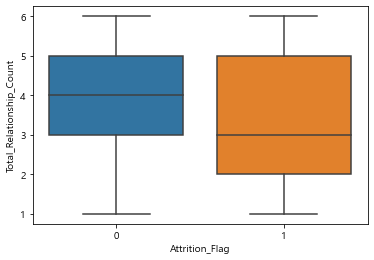

In [30]:
sns.boxplot(y = data['Total_Relationship_Count'], x = data['Attrition_Flag']) #Total_Relationship_Count :고객이 보유한 총 제품 수 (수치)

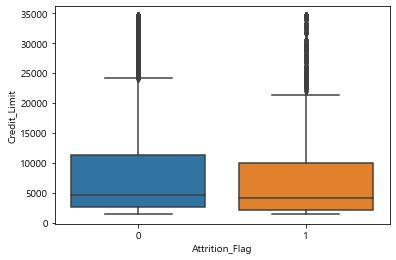

In [31]:
sns.boxplot(y = data['Credit_Limit'], x = data['Attrition_Flag']) #Credit_Limit : 신용카드 신용 한도 (수치)

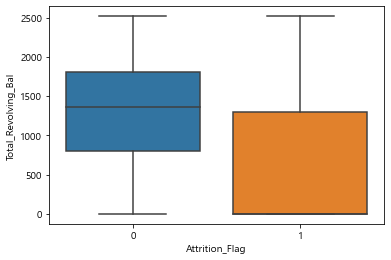

In [32]:
sns.boxplot(y = data['Total_Revolving_Bal'], x = data['Attrition_Flag']) #Total_Revolving_Bal : 신용카드의 총 회전 잔액 (수치)

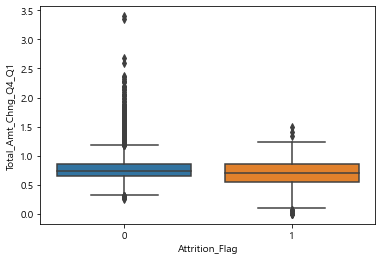

In [33]:
sns.boxplot(y = data['Total_Amt_Chng_Q4_Q1'], x = data['Attrition_Flag']) #Total_Amt_Chng_Q4_Q1 :거래 금액의 변동 (1분기 대비 4분기) (수치)

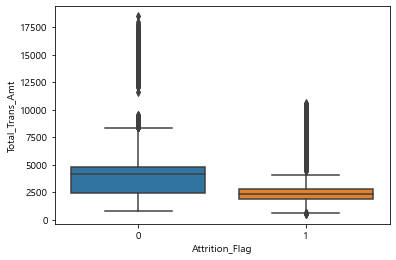

In [34]:
sns.boxplot(y = data['Total_Trans_Amt'], x = data['Attrition_Flag']) #Total_Trans_Amt : 12개월간 총 거래 금액 (수치)

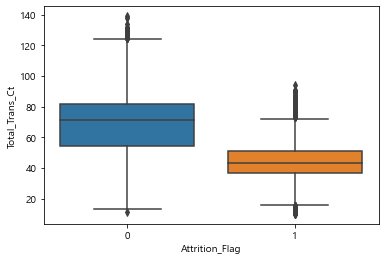

In [35]:
sns.boxplot(y = data['Total_Trans_Ct'], x = data['Attrition_Flag']) #Total_Trans_Ct : 12개월간 총 거래 수 (수치)

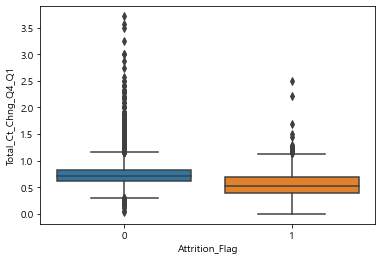

In [36]:
sns.boxplot(y = data['Total_Ct_Chng_Q4_Q1'], x = data['Attrition_Flag'])#Total_Ct_Chng_Q4_Q1 : 거래 건수 변화 (1분기 대비 4분기) (수치)

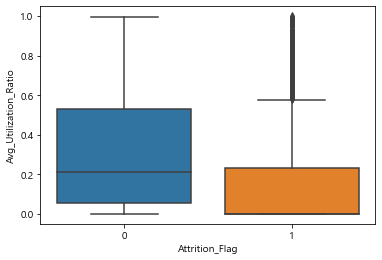

In [37]:
sns.boxplot(y = data['Avg_Utilization_Ratio'], x = data['Attrition_Flag']) #Avg_Utilization_Ratio : 평균 카드 사용률 (수치)

# 연령에 따른 고객 이탈 비교

In [38]:
print('Max',data['Customer_Age'].max())
print('Min',data['Customer_Age'].min())
print('Average',data['Customer_Age'].mean())

Max 73
Min 26
Average 46.32596030413745


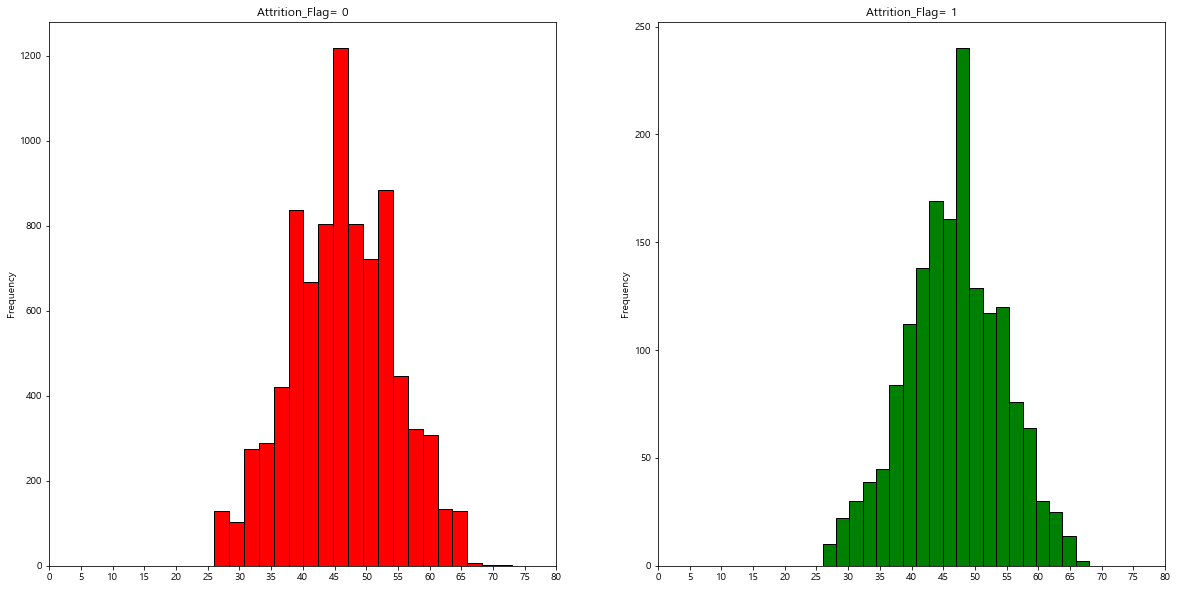

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Attrition_Flag']==0].Customer_Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Attrition_Flag= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Attrition_Flag']==1].Customer_Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Attrition_Flag= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 왼쪽(이탈하지 않음) / 오른쪽(이탈함)
- 이탈하지 않은 사람을 보았을 때 40대 초반과 50대 초반에서 이탈하지 않은 사람이 갑자기 줄어드는것이 보임 하지만 40에서 40 중간에 이탈을 가장 많이 하지 않음  
- 이탈한 사람들을 보았을 때 40대 후반을 기준으로 정규분포의 형태를 보임 즉, 40대 후반전에는 이탈 비율이 적다가 점점 많아지지만 40대 후반 이후로는 다시 줄어드는 경향을 보이는 것 

# 부양가족 수와 나이에 따른 이탈율 

In [40]:
print('Max:',data['Avg_Utilization_Ratio'].max())
print('Min',data['Avg_Utilization_Ratio'].min())
print('Average',data['Avg_Utilization_Ratio'].mean())

Max: 0.9990000000000001
Min 0.0
Average 0.2748935518909845


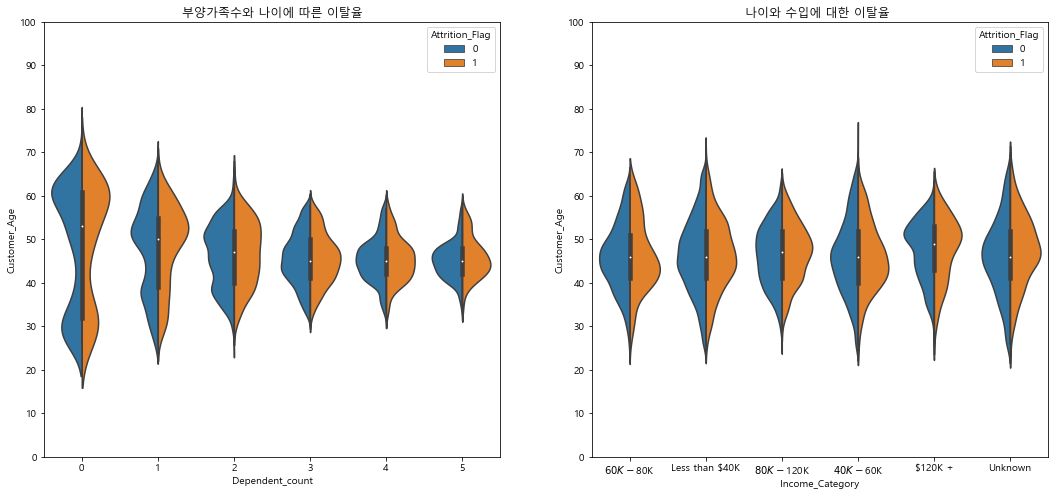

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Dependent_count","Customer_Age", hue="Attrition_Flag", data=data,split=True,ax=ax[0])
ax[0].set_title('부양가족수와 나이에 따른 이탈율')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Income_Category","Customer_Age", hue="Attrition_Flag", data=data,split=True,ax=ax[1])  # 바이올린 플롯
ax[1].set_title('나이와 수입에 대한 이탈율 ')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 해석
- 부양하는 가족 수가 많아 질수록 40-50대의 이탈율이 늘어남 


# 이탈한 사람과 아닌 사람의 신용 한도(구매 가능) 지난 12개월간 평균 

In [42]:
print('Max:',data['Avg_Open_To_Buy'].max())
print('Min :',data['Avg_Open_To_Buy'].min())
print('Average:',data['Avg_Open_To_Buy'].mean())

Max: 34516.0
Min : 3.0
Average: 7469.139636614887


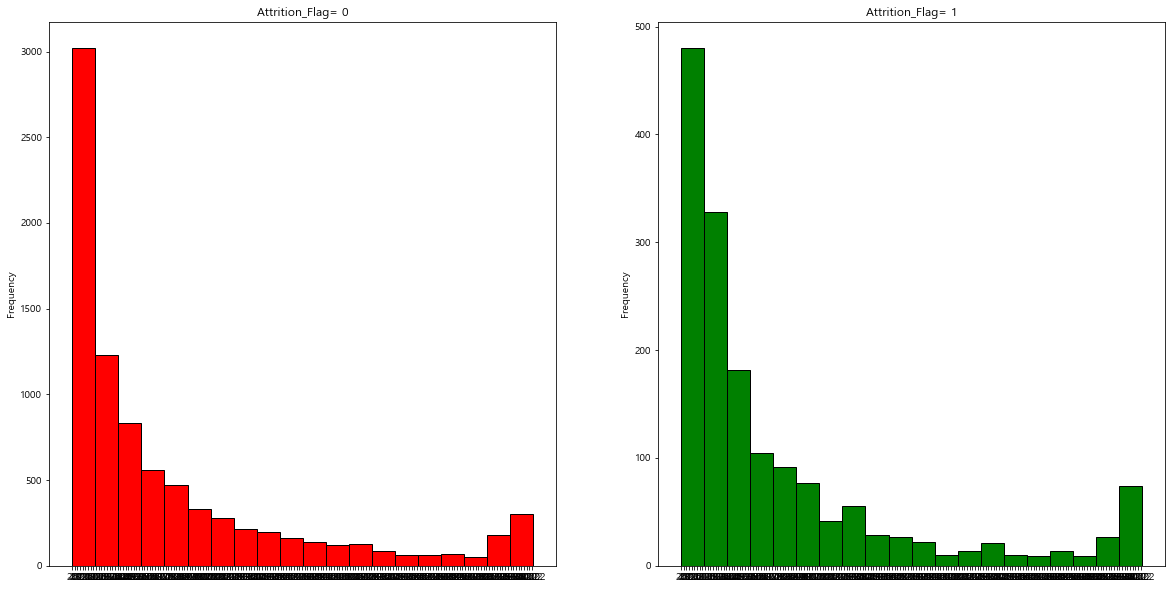

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Attrition_Flag']==0].Avg_Open_To_Buy.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Attrition_Flag= 0')
x1=list(range(2,34600,200))
ax[0].set_xticks(x1)
data[data['Attrition_Flag']==1].Avg_Open_To_Buy.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Attrition_Flag= 1')
x2=list(range(2,34600,200))
ax[1].set_xticks(x2)
plt.show()

# 거래 건수 변화 (1분기 대비 4분기)가 클수록 이탈하는 사람이 작아지는지

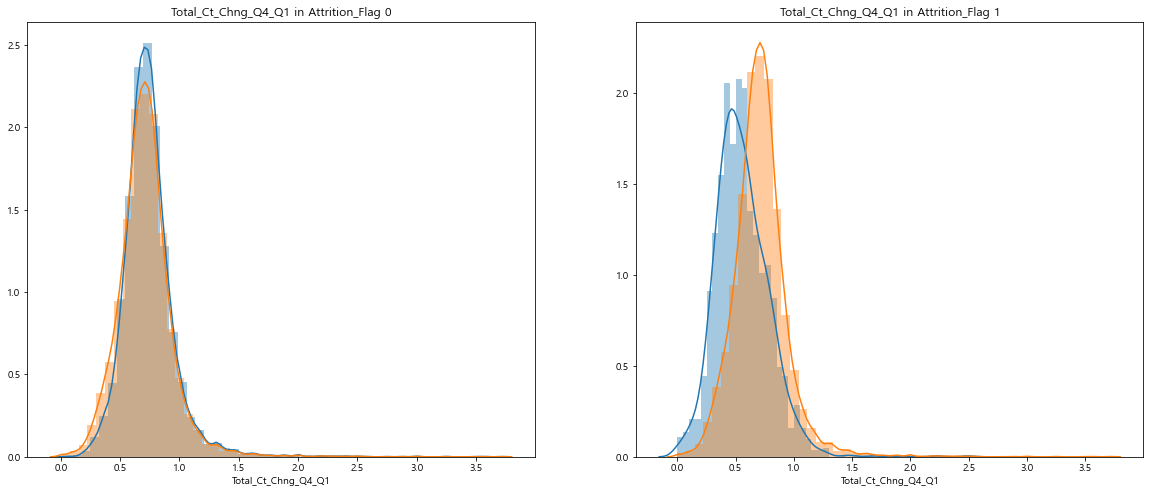

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['Attrition_Flag']==0].Total_Ct_Chng_Q4_Q1 ,ax=ax[0])
ax[0].set_title('Total_Ct_Chng_Q4_Q1 in Attrition_Flag 0')
sns.distplot(data[data['Attrition_Flag']!=2].Total_Ct_Chng_Q4_Q1 ,ax=ax[0])
sns.distplot(data[data['Attrition_Flag']==1].Total_Ct_Chng_Q4_Q1 ,ax=ax[1])
ax[1].set_title('Total_Ct_Chng_Q4_Q1 in Attrition_Flag 1')
sns.distplot(data[data['Attrition_Flag']!=2].Total_Ct_Chng_Q4_Q1 ,ax=ax[1])
plt.show()

- 1분기와 4분기 거래 건수 변화가 크다는 것은 시간이 갈 수록 더 많은 이용을 했다는 의미
- 그래프를 보면 거래건수 변화가 작을 때 이탈율이 더 큰 것으로 보임 
    - 즉, 카드 사용이 점점 줄다가 이탈로 이어진 것으로 보임

# 은행과 거래한 기간이 길수록 이탈하는 사람이 적은지

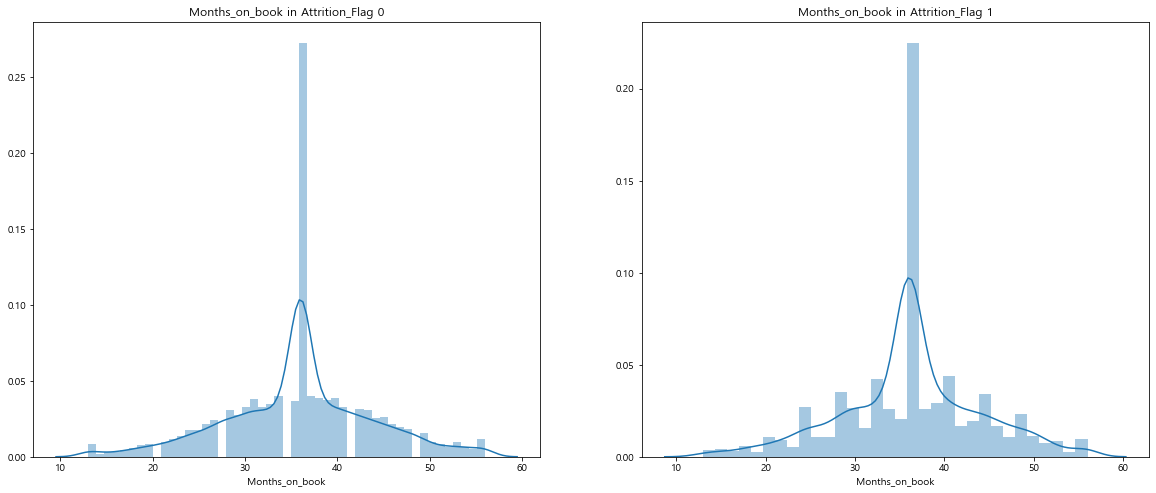

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['Attrition_Flag']==0].Months_on_book,ax=ax[0])
#sns.distplot(data[data['Attrition_Flag']!=2].Months_on_book,ax=ax[0])
ax[0].set_title('Months_on_book in Attrition_Flag 0')
sns.distplot(data[data['Attrition_Flag']==1].Months_on_book,ax=ax[1])
#sns.distplot(data[data['Attrition_Flag']!=2].Months_on_book,ax=ax[1])
ax[1].set_title('Months_on_book in Attrition_Flag 1')
plt.show()

- 은행과 거래한 기간이 짧을 수록 이탈하는 사람이 많을 것으로 예상했지만 은행과의 거래 기간의 3년 정도되면 이탈율이 심하게 많음 
- 이탈한 사람을 보았을 때 기간이 길어 질 수록 이탈하는 사람이 많은 것으로 보임 

# 신용카드 잔액과 이탈비교 

C:\Users\rlawj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


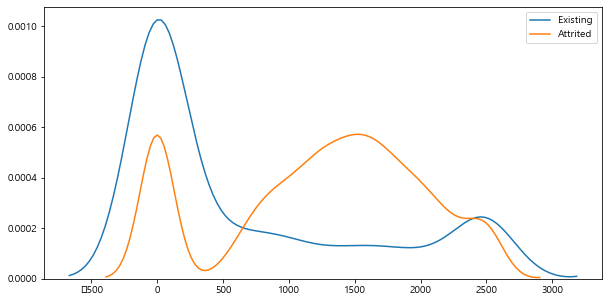

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(data[data['Attrition_Flag'] == 1]['Total_Revolving_Bal'], ax=ax)
sns.kdeplot(data[data['Attrition_Flag'] == 0]['Total_Revolving_Bal'], ax=ax)

plt.legend(['Existing', 'Attrited'])

plt.show()

- 해석 :  신용카드의 잔액이 적을 수록 해지하는 고객이 많음 

# 평균 카드 사용률이 높을 수록 이탈하는 사람이 적은지

In [46]:
data['Avg_Utilization_Ratio'] = (data['Avg_Utilization_Ratio']*1000).astype(np.int64)

In [47]:
print('Max:',data['Avg_Utilization_Ratio'].max())
print('Min :',data['Avg_Utilization_Ratio'].min())
print('Average:',data['Avg_Utilization_Ratio'].mean())

Max: 999
Min : 0
Average: 274.8146538955268


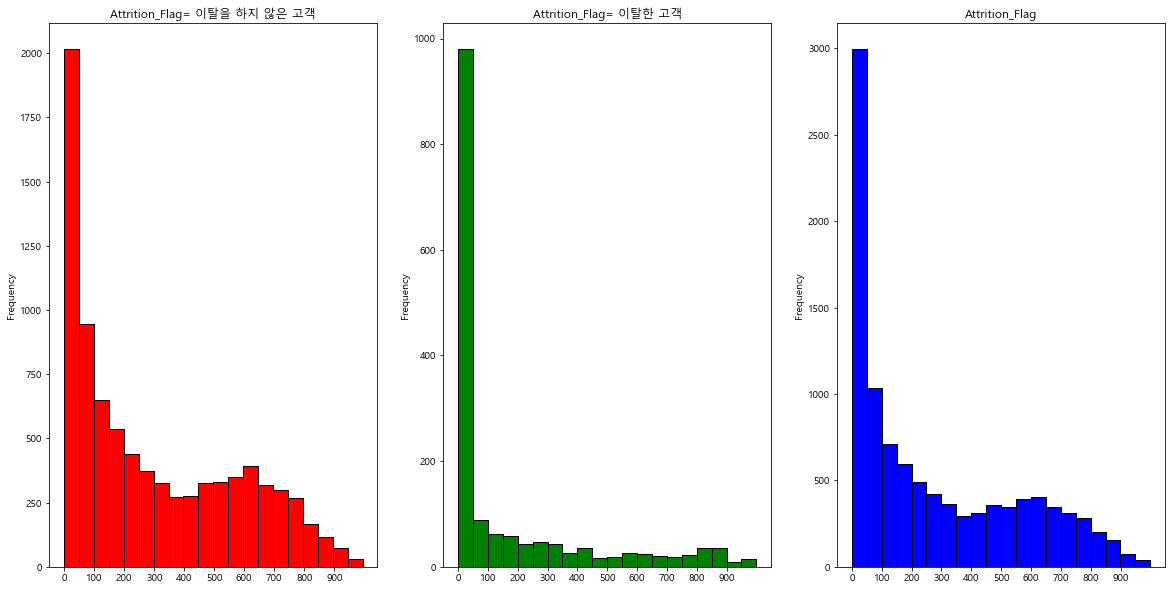

In [48]:
f,ax=plt.subplots(1,3,figsize=(20,10))
data[data['Attrition_Flag']==0].Avg_Utilization_Ratio.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Attrition_Flag= 이탈을 하지 않은 고객')
x1=list(range(0,1000,100))
ax[0].set_xticks(x1)
data[data['Attrition_Flag']==1].Avg_Utilization_Ratio.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Attrition_Flag= 이탈한 고객')
x2=list(range(0,1000,100))
ax[1].set_xticks(x2)
data[data['Attrition_Flag']!= 2].Avg_Utilization_Ratio.plot.hist(ax=ax[2],color='blue',bins=20,edgecolor='black')
ax[2].set_title('Attrition_Flag')
x3=list(range(0,1000,100))
ax[2].set_xticks(x2)
plt.show()

- 평균 카드 사용률이 높을 수록 이탈하는 사람이 적어짐

### 수치형 변수별 상관분석

C:\Users\rlawj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


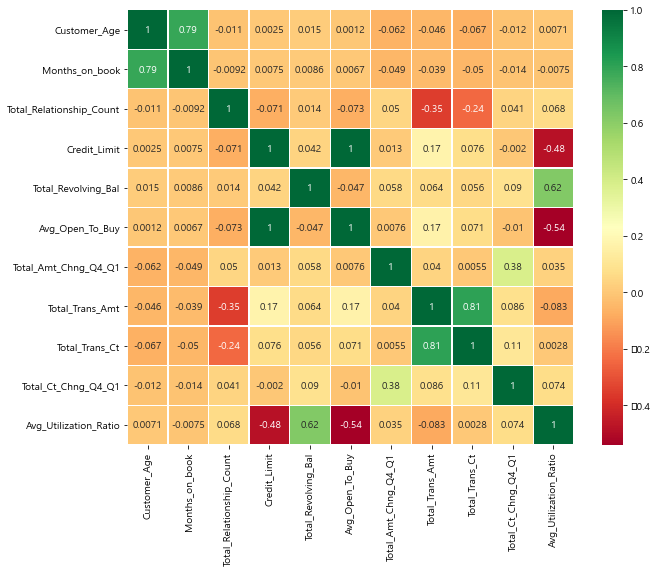

In [49]:
sns.heatmap(data[["Customer_Age",
                  "Months_on_book",
                  "Total_Relationship_Count",
                  "Credit_Limit" ,
                  "Total_Revolving_Bal", 
                  "Avg_Open_To_Buy",
                  "Total_Amt_Chng_Q4_Q1", 
                  "Total_Trans_Amt", 
                  "Total_Trans_Ct", 
                  "Total_Ct_Chng_Q4_Q1",
                  "Avg_Utilization_Ratio"]].corr(),
            annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 수치형 상관분석 해석
    1. Avg_Open_To_Buy와 Credit_Limit의 상관관계가 1로 나왔다.
        - (Credit_Limit : 신용카드 신용 한도 / Avg_Open_To_Buy : 신용 한도(구매 가능) 지난 12개월간 평균)
    2. Customer_Age와 Months_on_book의 상관관계가 0.79로 높은 양의 상관관계를 보인다.
        - (Customer_Age : 고객의 나이 / Months_on_book : 은행과 거래한 기간)
    3. Total_Trans_Amt와 Total_Trans_Ct의 상관관계가 0.81로 높은 양의 상관관계를 보인다.     
        - (Total_Trans_Amt : 12개월간 총 거래 금액 / Total_Trans_Ct : 12개월간 총 거래 수)

# 독립성 검정
- target변수와 범주형 변수간의 관계 파악
- 귀무가설 => 두 변수는 독립이다.
- 대립가설 => 두 변수는 독립이 아니다.

### 카드 비활성화 상태인 개월수와 이탈은 관계가 있나?
- Months_Inactive_12_mon / Attrition_Flag

In [82]:
cross_data_month = pd.crosstab(data['Months_Inactive_12_mon'], data['Attrition_Flag']  ,margins=True)
cross_data_month

Attrition_Flag,0,1,All
Months_Inactive_12_mon,,,
0,14,15,29
1,2133,100,2233
2,2777,505,3282
3,3020,826,3846
4,305,130,435
5,146,32,178
6,105,19,124
All,8500,1627,10127


In [87]:
cross_prop_data_month = pd.crosstab(data['Months_Inactive_12_mon'], data['Attrition_Flag'] , normalize=True ,margins=True)
cross_prop_data_month

Attrition_Flag,0,1,All
Months_Inactive_12_mon,,,
0,0.001382,0.001481,0.002864
1,0.210625,0.009875,0.220500
2,0.274217,0.049867,0.324084
3,0.298213,0.081564,0.379777
4,0.030118,0.012837,0.042954
5,0.014417,0.003160,0.017577
6,0.010368,0.001876,0.012244
All,0.839340,0.160660,1.000000


In [76]:
from scipy.stats import chisquare
import scipy.stats as stats

In [85]:
chi_res  = stats.chi2_contingency(observed = cross_data_month)
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 396.45619934093764, p-value: 7.072411811462776e-76


### 지난 12개월 동안 활동한 개월 수와 이탈은 관계가 있나?
- Contacts_Count_12_mon / Attrition_Flag

In [137]:
cross_data_con = pd.crosstab(data['Contacts_Count_12_mon'], data['Attrition_Flag']  ,margins=True)
cross_data_con

Attrition_Flag,0,1,All
Contacts_Count_12_mon,,,
0,392,7,399
1,1391,108,1499
2,2824,403,3227
3,2699,681,3380
4,1077,315,1392
5,117,59,176
6,0,54,54
All,8500,1627,10127


In [138]:
cross_data_prop_con = pd.crosstab(data['Contacts_Count_12_mon'], data['Attrition_Flag'] ,normalize=True ,margins=True)
cross_data_prop_con

Attrition_Flag,0,1,All
Contacts_Count_12_mon,,,
0,0.038708,0.000691,0.039400
1,0.137356,0.010665,0.148020
2,0.278858,0.039795,0.318653
3,0.266515,0.067246,0.333761
4,0.106349,0.031105,0.137454
5,0.011553,0.005826,0.017379
6,0.000000,0.005332,0.005332
All,0.839340,0.160660,1.000000


In [141]:
chi_res  = stats.chi2_contingency(observed = cross_data_con)
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 586.6384841537745, p-value: 3.704478327296105e-116


## poiontbiserialr correlation 
- 수치형 변수와 범주형 변수간의 관계 파악

In [142]:
stats.pointbiserialr(data['Total_Revolving_Bal'],data['Attrition_Flag'])

PointbiserialrResult(correlation=-0.26305288312920255, pvalue=6.63014845530425e-160)

In [143]:
stats.pointbiserialr(data['Total_Ct_Chng_Q4_Q1'],data['Attrition_Flag'])

PointbiserialrResult(correlation=-0.29005400688088834, pvalue=1.6477247846751795e-195)

In [144]:
stats.pointbiserialr(data['Avg_Utilization_Ratio'],data['Attrition_Flag'])

PointbiserialrResult(correlation=-0.17837612547381237, pvalue=3.579626905486274e-73)